In [6]:
import xarray
# import gsw
import numpy as np
import matplotlib.pyplot as plt

Read in the data and see the coordinates and variables it contains. The description of this
data is available [here](https://icdc.cen.uni-hamburg.de/en/woce-climatology.html) and [here](ftp://ftp-icdc.cen.uni-hamburg.de/WOCE/climatology/observed_data/BSH35_report_final.pdf) (skim over it!)

In [10]:
data_list=[]
for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
        data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
#         data_new = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_new = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_list.append(data_new[0])
data_arr=np.array(data_list);

In [12]:

for i in range(1,5):
    if i==1:
        yearly_summed_data = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_summed_data = yearly_summed_data + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg_data = yearly_summed_data/5




In [14]:
yav_data = yearly_avg_data[0]

print(np.max((yearly_avg_data[7]==yearly_avg_data[11])*1))
yav_data.shape
yav_data[:,0].shape


reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
lon_diff_data = np.diff(lon_data_proc, axis=1)


lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
lat_diff_data = np.diff(lat_data_proc, axis=0)



0
(360, 721)
(361, 720)


In [15]:
reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
lon_data_proc = np.concatenate((yav_data, yav_data[:,0].reshape(len(yav_data[:,0]),1)), axis=1)

lat_list = np.linspace(-89.75, 89.75, 360)
lon_list = np.linspace(-179.75, 179.75, 720);

omega = 7.2921*(10**-5)

f=2*omega*np.sin(np.deg2rad(lat_list))
g = 9.8
r = 6370e3

dlat = 2*np.pi*(0.5/360)*r
dlon = 2*np.pi*r*(0.5/360)*np.cos(np.deg2rad(lat_list)).reshape(360,1)* np.ones((360,720))

lat_grad_1 = (-g/f.reshape(len(f),1))*(lat_diff_data/dlat)   #.reshape(len(lat_list),1))
lon_grad_1 = (g/f.reshape(len(f),1))*(lon_diff_data/dlon) #.reshape(1,len(lon_list)))


mag_arr = np.sqrt(lon_grad_1**2 + lat_grad_1**2)
mag_arr[mag_arr == 0] = 'nan'
lat_grad = lat_grad_1/mag_arr
lon_grad = lon_grad_1/mag_arr

A = np.sqrt(lat_grad**2 + lon_grad**2)
print(np.max(A[~np.isnan(A)]))

1.0000000000000002


In [20]:
latMesh= np.linspace(-89.75, 89.75, 360).reshape(360,1)* np.ones((360,720))
lonMesh = np.linspace(-179.75, 179.75, 720).reshape(1,720)* np.ones((360,720))

In [21]:
print(lat_grad[31,135],lon_grad[31,135])

-0.6024126755479348 0.7981847958581889


0.9999999999999998


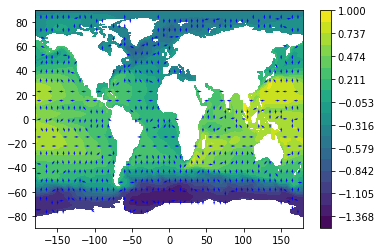

In [24]:
%matplotlib inline
quiver_slices = (slice(None, None, 15), slice(None, None, 15))
# quiver_kwargs = {'headlength': 40, 'headwidth': 20, 'angles': 'uv', 'scale_units': 'xy',
#                  'scale': 2}





level=np.linspace(-1.5,1,20)
plt.contourf(lonMesh, latMesh, yav_data,  levels=level)
plt.colorbar()
#yav_data
plt.quiver(lonMesh[quiver_slices], latMesh[quiver_slices],
                 lon_grad[quiver_slices], lat_grad[quiver_slices],
                 color='blue')



plt.savefig("dar1.png", dpi = 2000)


In [110]:
%matplotlib notebook 
data.loc[dict(longitude=slice(-120.25, 120.75), latitude=slice(15.75, 50.75))].SSH.plot

Plot the temperature at different levels (by selecting the relevant vertical coordinate).

Here you will see the water temperature at 1000 meters below the surface. Can you interpret the 
patterns? The textbook (section 13.4) and the assigned book chapter should help!

(360, 721)


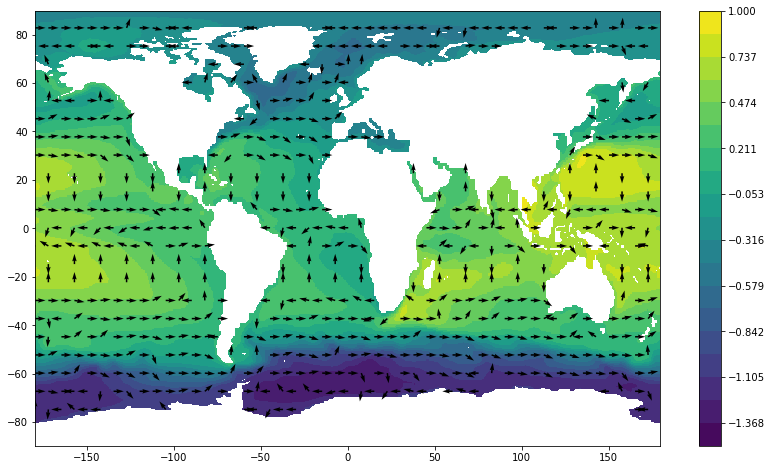

(360, 721)


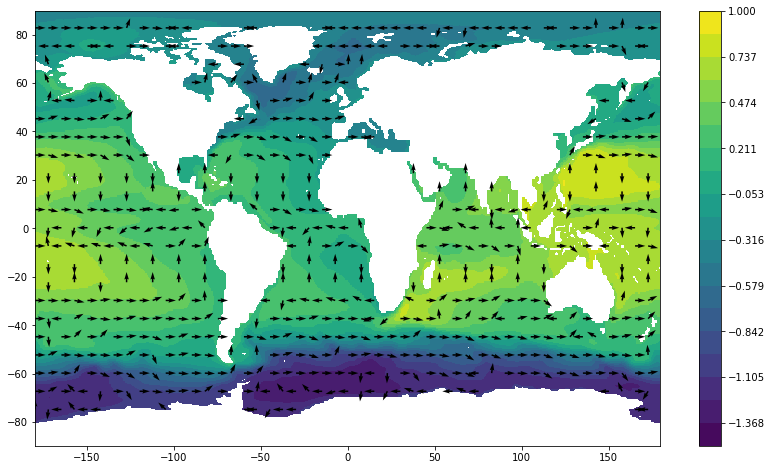

In [43]:
import xarray
import gsw
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline



lat_array = np.linspace(-89.75, 89.75, 360)
lon_array = np.linspace(-179.75, 179.75, 720)

omega = 7.2921*(10**-5)

f=2*omega*np.sin(np.deg2rad(lat_array))
g = 9.8
radius = 6370e3



dlat = 2*np.pi*(0.5/360)*radius
dlon = 2*np.pi*radius*(0.5/360)*np.cos(np.deg2rad(lat_array)).reshape(360,1)* np.ones((360,720))

data_array = []


for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
        data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
        new_data = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_array.append(new_data[0])
data_arr=np.array(data_array)

# getting the average 

for i in range(1,5):
    if i==1:
        yearly_sum = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_sum = yearly_sum + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg = yearly_sum/5

lat_grid = np.linspace(-89.75, 89.75, 360).reshape(360,1)* np.ones((360,720))
lon_grid = np.linspace(-179.75, 179.75, 720).reshape(1,720)* np.ones((360,720))
steps = (slice(None, None, 15), slice(None, None, 15))

for i in range (2):
 yav_data=yearly_avg[i]



 reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
 lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
 lon_diff_data = np.diff(lon_data_proc, axis=1)
 print(lon_data_proc.shape)


 lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
 lat_diff_data = np.diff(lat_data_proc, axis=0)


 ug = -(g/f.reshape(len(f),1))*(lat_diff_data/dlat)  #vg #.reshape(len(lat_array),1))
 vg = (g/f.reshape(len(f),1))*(lon_diff_data/dlon) # ug .reshape(1,len(lon_array)))

 for i in range(360):
    for j in range (720):
        if(i==359 or j==719):
            ug[i,j]=math.nan
            vg[i,j]=math.nan


 mag_arr = np.sqrt(ug**2 + vg**2)
 mag_arr[mag_arr == 0] = 'nan'
 ugNormal = ug/mag_arr
 vgNormal = vg/mag_arr


    

 plt.figure(figsize=(14,8))
 level=np.linspace(-1.5,1,20)



 plt.contourf(lon_grid, lat_grid, yav_data,levels=level) #,cmap=plt.get_cmap('Greens')
 plt.colorbar()



 plt.quiver(lon_grid[steps], lat_grid[steps],
                 ugNormal[steps], vgNormal[steps],
                 color='black')

 plt.show()

